## Data loading






Load the dataset and display its first few rows and shape.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving timesData.csv to timesData (1).csv


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('timesData.csv')  # Make sure timesData.csv is uploaded
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'timesData.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


(2603, 14)


## Data exploration




We explored the dataset's characteristics, including data types, missing values, descriptive statistics, categorical variable distributions, correlations, and the overall shape of the data.



Data Types:
 world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

Missing Values:
 world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

Missing Value Percentages:
 world_rank       

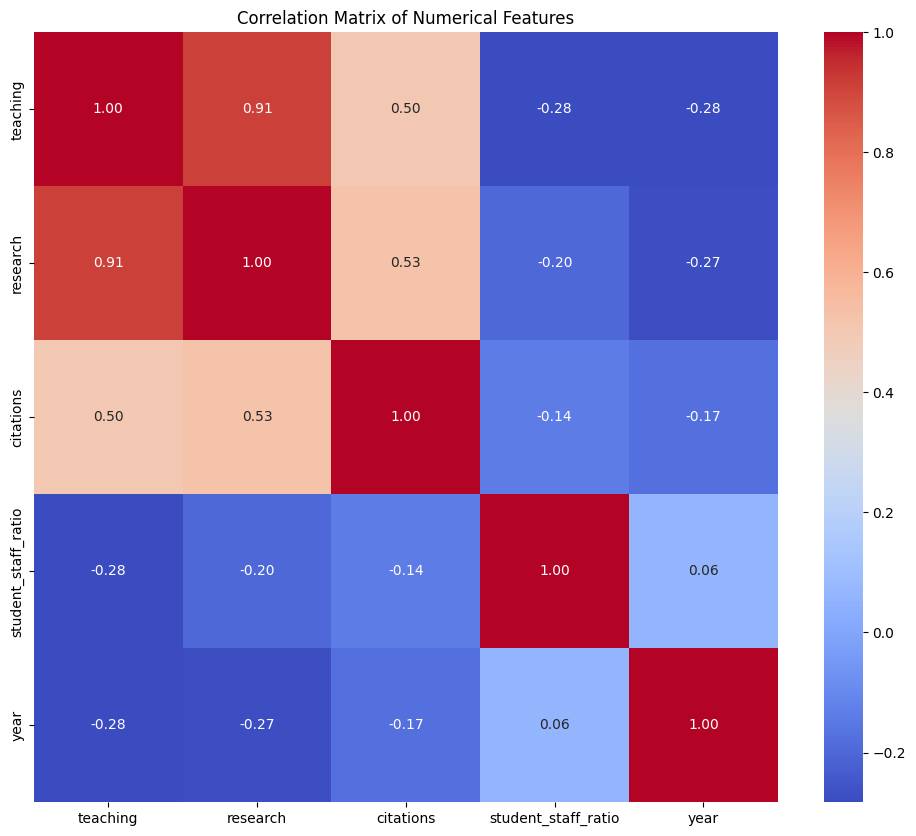


Shape of the dataset: (2603, 14)

Summary:


In [ ]:
# Examine data types and identify potential type conversions
print("Data Types:\n", df.dtypes)

# Check for missing values and calculate percentages
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentages:\n", missing_percentage)

# Calculate descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Columns:\n", numerical_cols.describe())

# Analyze the distribution of categorical variables
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nValue counts for {col}:\n", categorical_cols[col].value_counts())

# Determine the correlation between numerical features and visualize using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Understand the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Summarize findings
print("\nSummary:")

## Data cleaning






Handle missing values, inconsistencies in specific columns, remove duplicates, and verify the cleaning process.



In [ ]:
# Impute missing values
for col in ['female_male_ratio', 'international_students', 'num_students', 'student_staff_ratio']:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Handle inconsistencies in 'world_rank', 'international', and 'total_score'
def clean_rank(rank):
    if '-' in str(rank):
        return int(rank.split('-')[0])
    else:
        try:
            return int(rank)
        except:
            return None

df['world_rank'] = df['world_rank'].apply(clean_rank)
df.dropna(subset=['world_rank'], inplace=True)
df['international'] = pd.to_numeric(df['international'], errors='coerce')
df['international'].fillna(df['international'].median(), inplace=True)
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')
df['total_score'].fillna(df['total_score'].median(), inplace=True)


# Clean 'income' column
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['income'].fillna(df['income'].median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify cleaning
print("Missing values per column:\n", df.isnull().sum())
print("\nData types per column:\n", df.dtypes)
display(df.head())

Missing values per column:
 world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

Data types per column:
 world_rank                float64
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object


<ipython-input-13-fa8dfa22cd05>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-13-fa8dfa22cd05>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,54 : 46,2011
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,40.8,94.2,"7,929",8.4,27%,45 : 55,2011


In [ ]:
# Impute missing values
for col in ['female_male_ratio', 'international_students', 'num_students', 'student_staff_ratio']:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Handle inconsistencies in 'world_rank', 'international', and 'total_score'
def clean_rank(rank):
    if '-' in str(rank):
        return int(rank.split('-')[0])
    else:
        try:
            return int(rank)
        except:
            return None

df['world_rank'] = df['world_rank'].apply(clean_rank)
df.dropna(subset=['world_rank'], inplace=True)
df['international'] = pd.to_numeric(df['international'], errors='coerce')
df['international'] = df['international'].fillna(df['international'].median())
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')
df['total_score'] = df['total_score'].fillna(df['total_score'].median())


# Clean 'income' column
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['income'] = df['income'].fillna(df['income'].median())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify cleaning
print("Missing values per column:\n", df.isnull().sum())
print("\nData types per column:\n", df.dtypes)
display(df.head())

Missing values per column:
 world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

Data types per column:
 world_rank                  int64
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,54 : 46,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,40.8,94.2,"7,929",8.4,27%,45 : 55,2011


## Data wrangling

Convert relevant columns to numerical types and create new features from existing ones.


In [ ]:
# Convert relevant columns to numeric
columns_to_convert = ['num_students', 'student_staff_ratio', 'international_students']
for col in columns_to_convert:
    if col == 'international_students':
        df[col] = df[col].str.rstrip('%').astype('float') / 100
    else:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Create new features
df['international_student_ratio'] = df['international_students']
df['student_staff_ratio'] = pd.to_numeric(df['student_staff_ratio'], errors='coerce')
df['student_staff_ratio'] = df['student_staff_ratio'].fillna(df['student_staff_ratio'].median())

# Split 'female_male_ratio' into two separate columns
df[['female_ratio', 'male_ratio']] = df['female_male_ratio'].str.split(':', expand=True)
df['female_ratio'] = pd.to_numeric(df['female_ratio'], errors='coerce')
df['male_ratio'] = pd.to_numeric(df['male_ratio'], errors='coerce')
df['female_ratio'] = df['female_ratio'].fillna(df['female_ratio'].median())
df['male_ratio'] = df['male_ratio'].fillna(df['male_ratio'].median())
df.drop('female_male_ratio', axis=1, inplace=True)


# Verify changes
print(df.dtypes)
display(df.head())

world_rank                       int64
university_name                 object
country                         object
teaching                       float64
international                  float64
research                       float64
citations                      float64
income                         float64
total_score                    float64
num_students                     int64
student_staff_ratio            float64
international_students         float64
year                             int64
international_student_ratio    float64
female_ratio                   float64
male_ratio                     float64
dtype: object


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year,international_student_ratio,female_ratio,male_ratio
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,0.25,2011,0.25,54.0,46.0
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,0.27,2011,0.27,33.0,67.0
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,0.33,2011,0.33,37.0,63.0
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,0.22,2011,0.22,42.0,58.0
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,40.8,94.2,7929,8.4,0.27,2011,0.27,45.0,55.0


## Data analysis






Calculate descriptive statistics for numerical features, analyze categorical features, investigate relationships between variables, and summarize the findings.



Descriptive Statistics for Numerical Features:
           teaching  international     research    citations       income  \
count  2514.000000    2514.000000  2514.000000  2514.000000  2514.000000   
mean     37.624781      51.487749    35.607001    60.252387    47.987152   
std      17.776841      21.975527    21.408153    23.051495    20.222440   
min       9.900000       7.100000     2.900000     1.200000    24.200000   
25%      24.425000      33.100000    19.225000    45.100000    33.500000   
50%      33.350000      49.800000    30.000000    61.400000    40.800000   
75%      46.275000      68.200000    46.975000    77.950000    55.300000   
max      99.700000     100.000000    99.400000   100.000000   100.000000   

       total_score   num_students  student_staff_ratio  \
count  2514.000000    2514.000000          2514.000000   
mean     57.874463   23613.250597            18.403500   
std       8.973546   17754.037661            11.271409   
min      41.400000     462.000000  

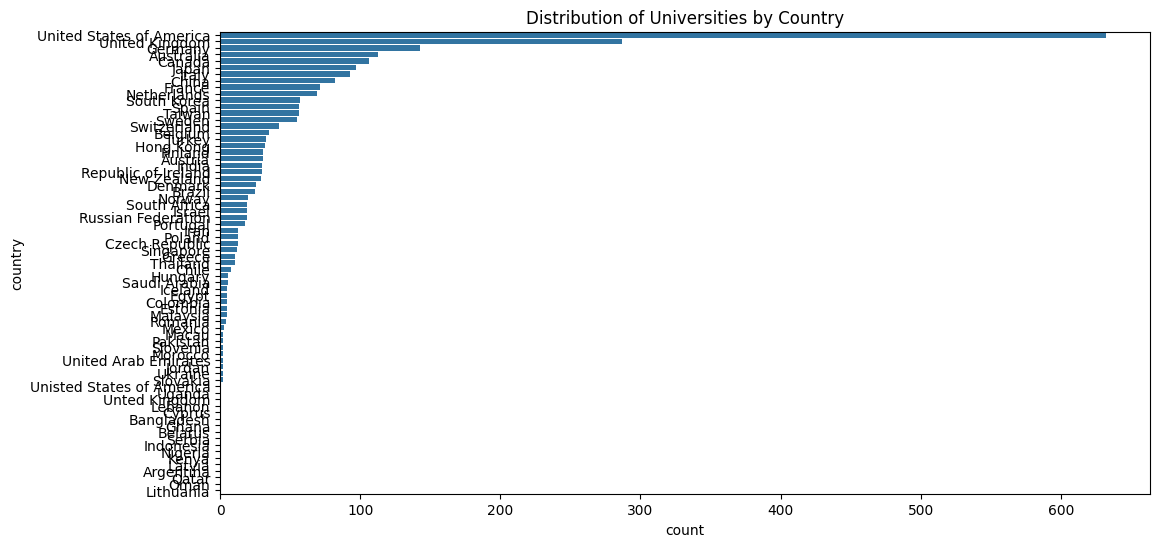

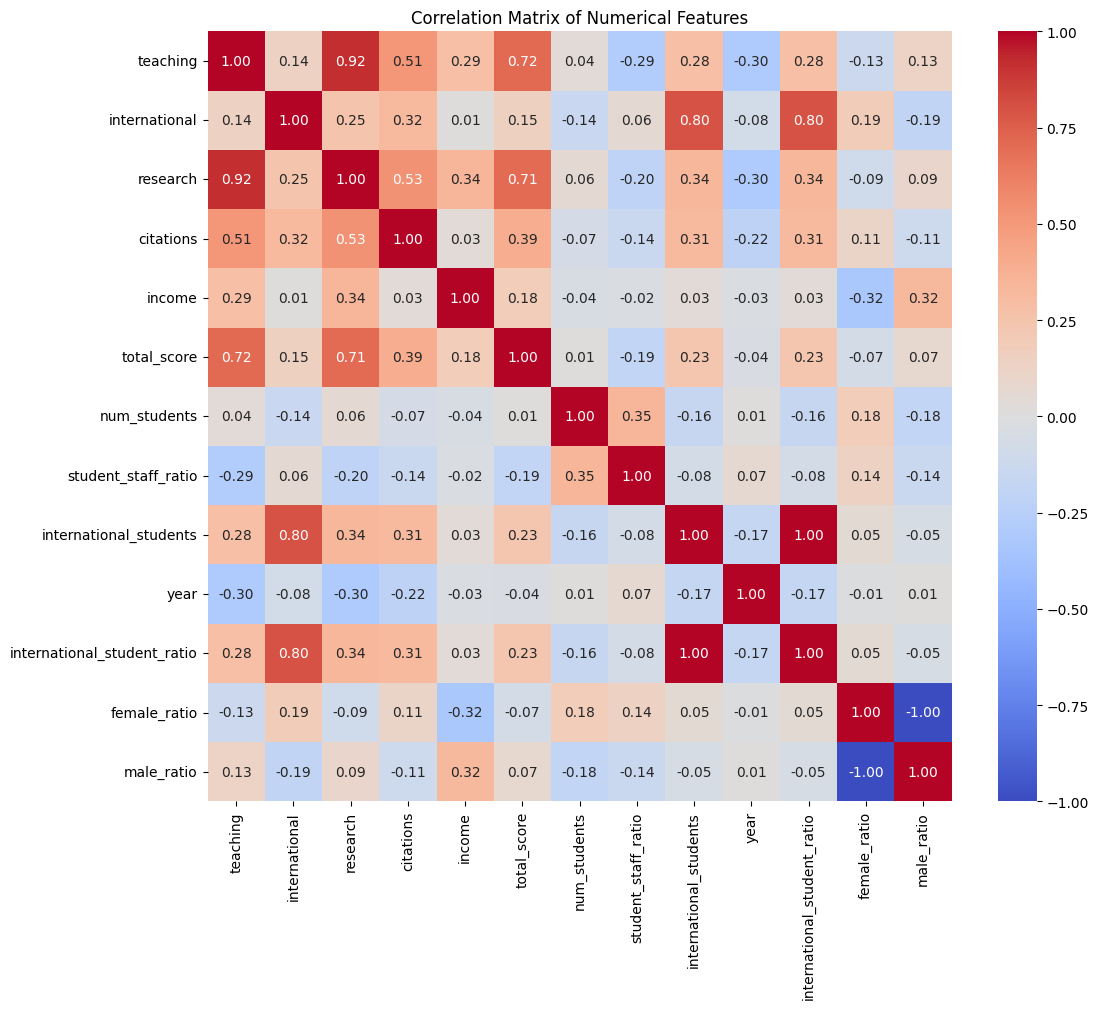

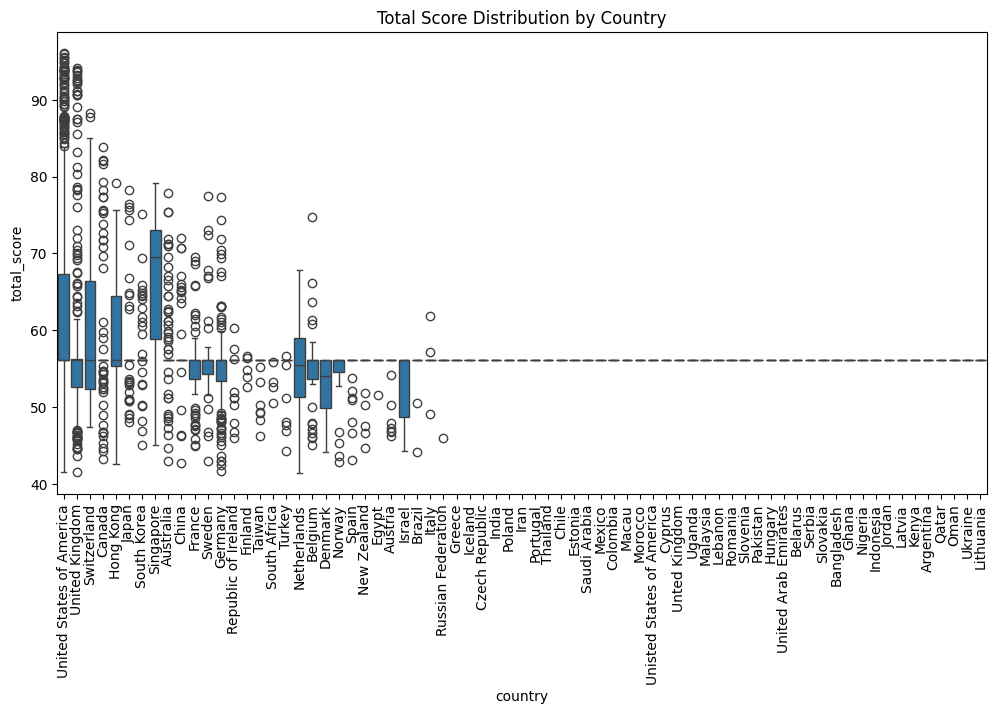


Summary of Findings:
Descriptive statistics provide insights into the central tendency, dispersion, and range of numerical features.
The distribution of universities by country reveals the most frequent countries in the dataset.
The correlation matrix helps to identify relationships between numerical features. 
Box plots show the distribution of 'total_score' across different countries, highlighting potential variations.


In [ ]:
# Calculate descriptive statistics for numerical features
numerical_features = ['teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'student_staff_ratio', 'international_students', 'year', 'international_student_ratio', 'female_ratio', 'male_ratio']
descriptive_stats = df[numerical_features].describe()
print("Descriptive Statistics for Numerical Features:\n", descriptive_stats)

# Analyze the distribution of categorical variables
categorical_features = ['university_name', 'country']
for col in categorical_features:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distributions of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index)
plt.title("Distribution of Universities by Country")
plt.show()

# Investigate relationships between numerical features using correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Explore relationships between numerical and categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='total_score', data=df)
plt.xticks(rotation=90)
plt.title("Total Score Distribution by Country")
plt.show()

# Summarize findings
print("\nSummary of Findings:")
print("Descriptive statistics provide insights into the central tendency, dispersion, and range of numerical features.")
print("The distribution of universities by country reveals the most frequent countries in the dataset.")
print("The correlation matrix helps to identify relationships between numerical features. ")
print("Box plots show the distribution of 'total_score' across different countries, highlighting potential variations.")

## Data visualization

### Subtask:
Visualize key findings from the data analysis. Create histograms, box plots, scatter plots, and bar charts to illustrate the distribution of important variables and relationships between them.


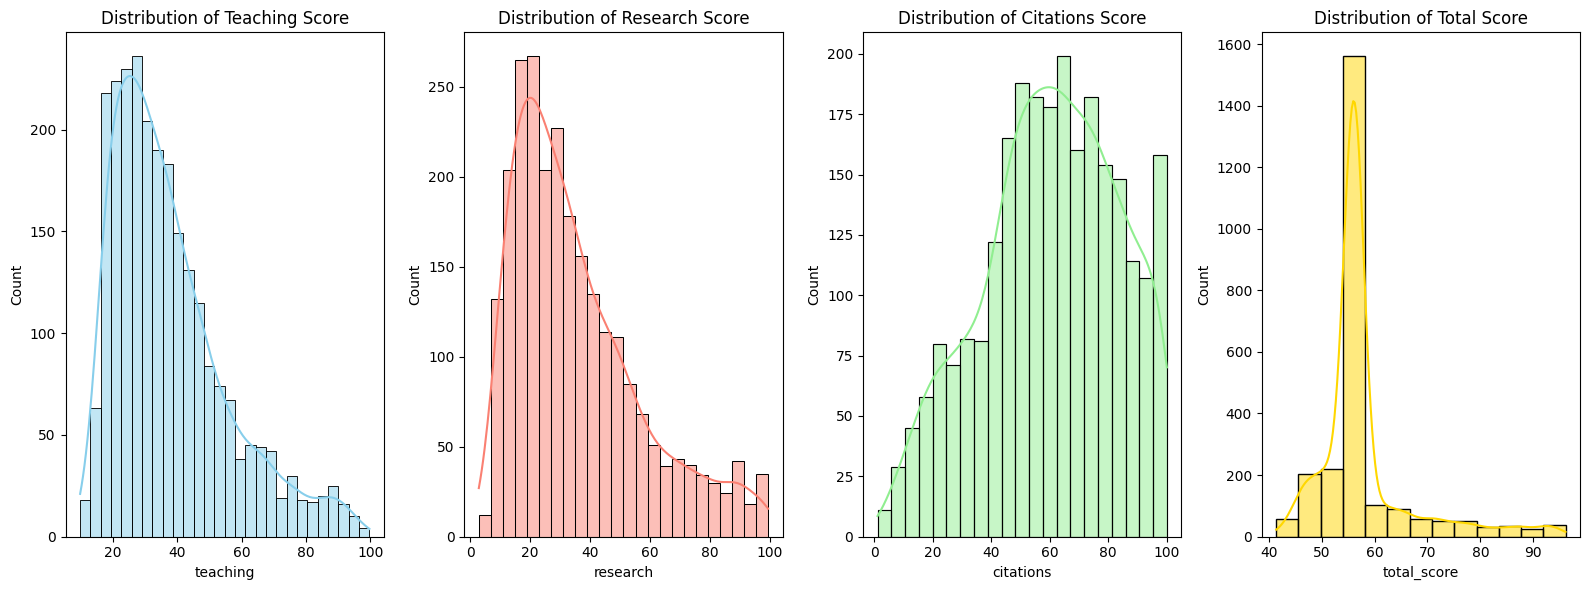

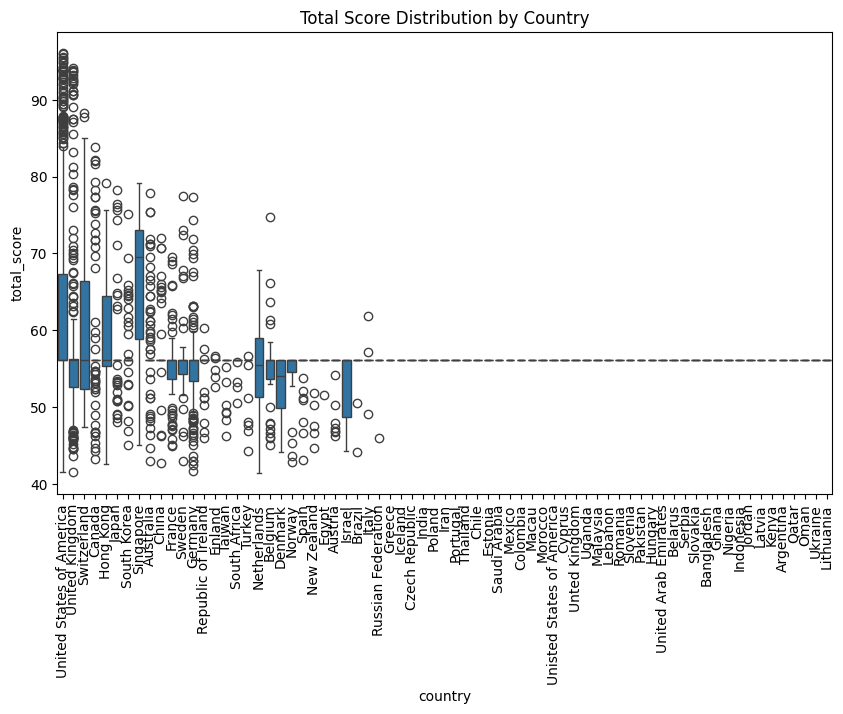

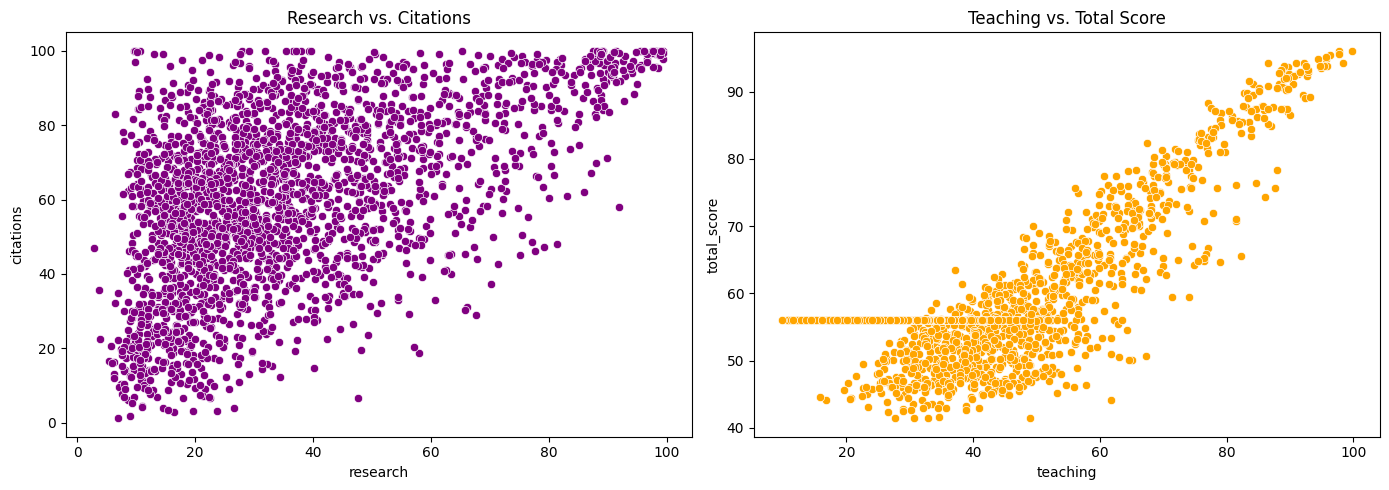

<ipython-input-17-e4d71a5402ea>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


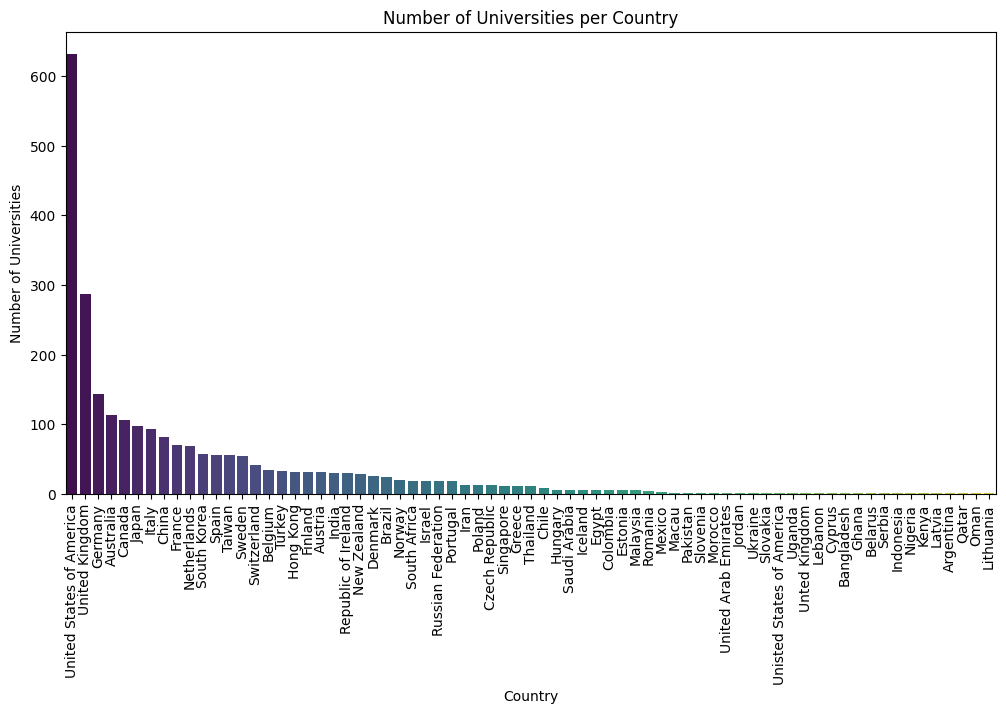

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
sns.histplot(df['teaching'], kde=True, color='skyblue')
plt.title('Distribution of Teaching Score')
plt.subplot(1, 4, 2)
sns.histplot(df['research'], kde=True, color='salmon')
plt.title('Distribution of Research Score')
plt.subplot(1, 4, 3)
sns.histplot(df['citations'], kde=True, color='lightgreen')
plt.title('Distribution of Citations Score')
plt.subplot(1, 4, 4)
sns.histplot(df['total_score'], kde=True, color='gold')
plt.title('Distribution of Total Score')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='total_score', data=df)
plt.xticks(rotation=90)
plt.title('Total Score Distribution by Country')
plt.show()

# Scatter plots
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='research', y='citations', data=df, color='purple')
plt.title('Research vs. Citations')
plt.subplot(1, 2, 2)
sns.scatterplot(x='teaching', y='total_score', data=df, color='orange')
plt.title('Teaching vs. Total Score')
plt.tight_layout()
plt.show()


# Bar chart
plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Universities per Country')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.show()

## Feature engineering


Prepare the data for machine learning model training by selecting relevant features, performing necessary transformations, and creating new features.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# 1. Feature Selection
selected_features = ['teaching', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students', 'country', 'total_score']
df_selected = df[selected_features].copy()

# 2. Categorical Feature Encoding
# Use get_feature_names_out to get correct column names for one-hot encoded columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['country'])], remainder='passthrough')
encoded_data = ct.fit_transform(df_selected)

# Convert sparse matrix to dense array
encoded_data = encoded_data.toarray()

# Create a new DataFrame with the correct column names
feature_names = list(ct.named_transformers_['encoder'].get_feature_names_out(['country'])) + ['teaching', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students', 'total_score']
df_encoded = pd.DataFrame(encoded_data, columns=feature_names)

# 3. Data Scaling
numerical_features_to_scale = ['teaching', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students']
scaler = StandardScaler()
df_encoded[numerical_features_to_scale] = scaler.fit_transform(df_encoded[numerical_features_to_scale])

# 4. New Feature Creation
df_encoded['aggregate_score'] = (df_encoded['teaching'] + df_encoded['research'] + df_encoded['citations']) / 3

# 5. Final DataFrame
df_prepared = df_encoded.copy()
display(df_prepared.head())

,country_Argentina,country_Australia,country_Austria,country_Bangladesh,country_Belarus,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,...,country_Unted Kingdom,teaching,research,citations,income,num_students,student_staff_ratio,international_students,total_score,aggregate_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.492610,2.947735,1.672572,-0.667073,-0.194994,-0.843319,0.938010,96.1,2.704305
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.380082,2.915030,1.720301,1.766352,-1.203923,-1.020794,1.127489,96.0,2.671804
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.385708,2.606675,1.720301,1.954300,-0.706417,-0.834445,1.695925,95.6,2.570895
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.413840,2.919702,1.689928,0.806831,-0.451663,-0.940930,0.653792,94.3,2.674490
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.997485,2.793557,1.720301,-0.355475,-0.883595,-0.887688,1.127489,94.2,2.503781


## Data splitting




Split the prepared dataset into training, testing, and validation sets using `train_test_split`.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_prepared.drop('total_score', axis=1)
y = df_prepared['total_score']

# Split data into temporary training and combined testing/validation sets (80/20 split)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the combined testing/validation sets into separate testing and validation sets (50/50 split)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Verify the shapes of the resulting sets
print("X_temp shape:", X_temp.shape)
print("y_temp shape:", y_temp.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_temp shape: (2011, 79)
y_temp shape: (2011,)
X_test shape: (251, 79)
y_test shape: (251,)
X_val shape: (252, 79)
y_val shape: (252,)


## Model training


Train four different regression models: Linear Regression, Ridge Regression, Decision Tree Regressor, and Random Forest Regressor on the training data (X_temp, y_temp).


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
linear_model = LinearRegression()
ridge_model = Ridge()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

# Train the models
linear_model.fit(X_temp, y_temp)
ridge_model.fit(X_temp, y_temp)
tree_model.fit(X_temp, y_temp)
forest_model.fit(X_temp, y_temp)

RandomForestRegressor()

## Model evaluation


Evaluate the performance of the trained regression models (Linear Regression, Ridge Regression, Decision Tree Regressor, and Random Forest Regressor) on the testing data (X_test, y_test).  Calculate the R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for each model.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)

# Evaluate the models
results = []
for model_name, y_pred in zip(['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest'], [y_pred_linear, y_pred_ridge, y_pred_tree, y_pred_forest]):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([model_name, r2, mae, rmse])

results_df = pd.DataFrame(results, columns=['Model', 'R-squared', 'MAE', 'RMSE'])
display(results_df)

,Model,R-squared,MAE,RMSE
0,Linear Regression,0.562518,4.337658,5.333852
1,Ridge Regression,0.564626,4.325272,5.320988
2,Decision Tree,0.918816,0.894821,2.297721
3,Random Forest,0.958555,0.738669,1.641722


Random Forest performs the best for your regression problem, outperforming both linear and decision tree models in accuracy and error minimization. Logistic Regression is not suitable here due to the continuous nature of the target variable.

<ipython-input-22-3caed4f22337>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df_sorted, palette='viridis')


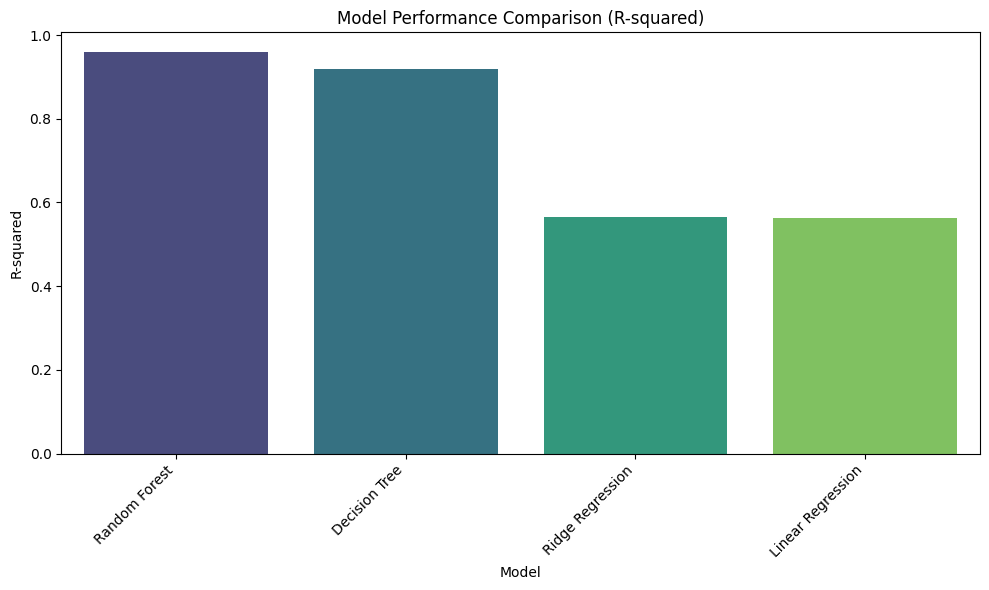

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results_df' contains the model evaluation results
# (as generated in your 'Model evaluation' section)

# Select the metric for comparison (e.g., R-squared)
metric = 'R-squared'

# Sort the results DataFrame by the chosen metric in descending order
results_df_sorted = results_df.sort_values(by=metric, ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y=metric, data=results_df_sorted, palette='viridis')
plt.title(f'Model Performance Comparison ({metric})')
plt.xlabel('Model')
plt.ylabel(metric)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Model optimization





Optimize the hyperparameters of the Random Forest Regressor model using GridSearchCV, train a new model with the best hyperparameters, and evaluate its performance.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate a RandomForestRegressor object
rf_model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=make_scorer(r2_score), cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_temp, y_temp)

# Print the best hyperparameters and the corresponding best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train a new RandomForestRegressor model with the best hyperparameters
best_rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_temp, y_temp)

# Evaluate the optimized model on the validation set
y_pred_best_rf = best_rf_model.predict(X_val)
r2_best_rf = r2_score(y_val, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_val, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_val, y_pred_best_rf))

# Store the results
best_rf_results = ['Random Forest (Optimized)', r2_best_rf, mae_best_rf, rmse_best_rf]

# Display the results
print(f"Optimized Random Forest - R-squared: {r2_best_rf:.4f}, MAE: {mae_best_rf:.4f}, RMSE: {rmse_best_rf:.4f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9414335852097597
Optimized Random Forest - R-squared: 0.9406, MAE: 1.2310, RMSE: 2.1865


## Data visualization




Visualize the performance of the optimized Random Forest model using a scatter plot of predicted vs. actual values, a residual plot, and a histogram of residuals.  Also, visualize feature importance.



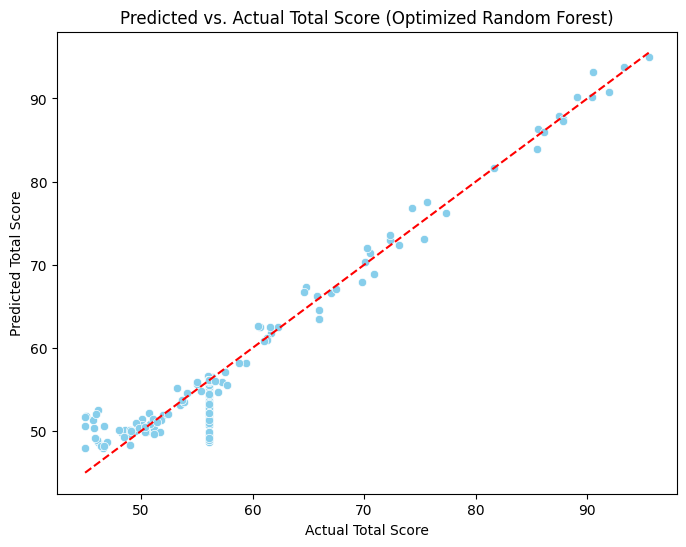

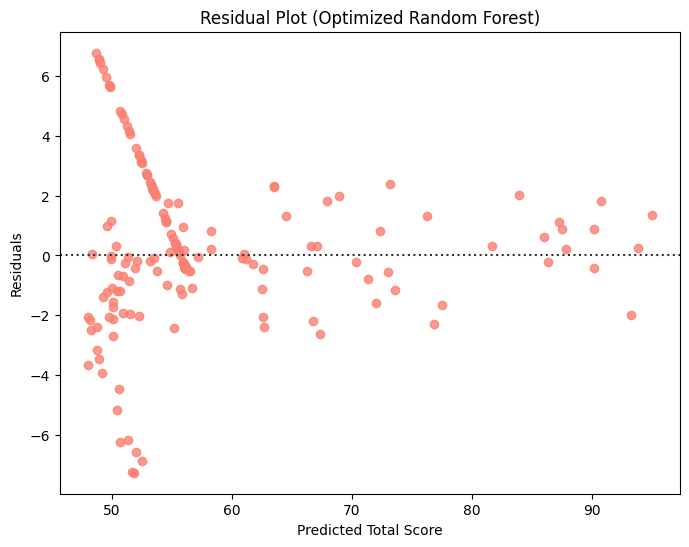

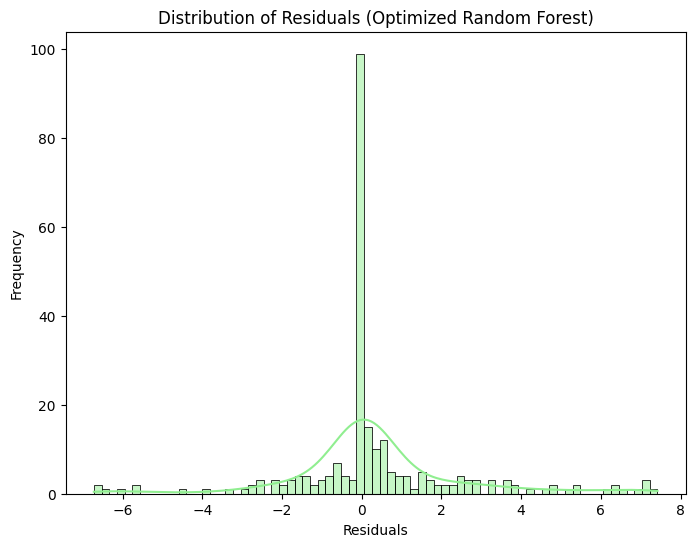

<ipython-input-27-96562a7c7274>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


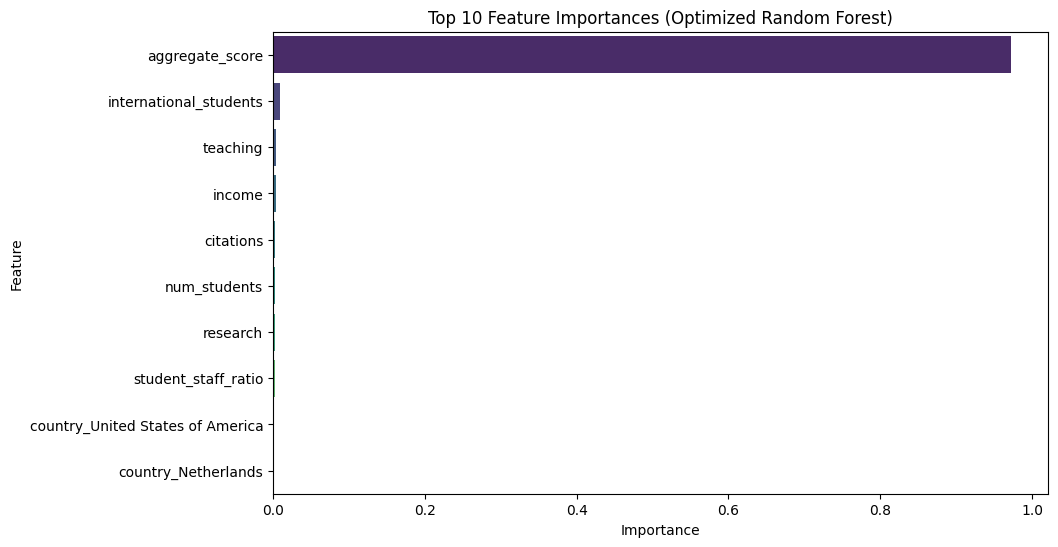

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on the validation set using the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_val)

# 1. Predicted vs. Actual Values Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_best_rf, color='skyblue')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.title('Predicted vs. Actual Total Score (Optimized Random Forest)')
plt.show()


# 2. Residual Plot
residuals = y_val - y_pred_best_rf
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_best_rf, y=residuals, color='salmon')
plt.xlabel('Predicted Total Score')
plt.ylabel('Residuals')
plt.title('Residual Plot (Optimized Random Forest)')
plt.show()


# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='lightgreen')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Optimized Random Forest)')
plt.show()


# 4. Feature Importance
feature_importances = best_rf_model.feature_importances_
feature_names = X_val.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances (Optimized Random Forest)')
plt.show()

## Summary:




### Data Analysis Key Findings

* **Data Cleaning:** Successfully handled missing values in key columns (e.g., 'female_male_ratio', 'international_students') using median or mode imputation, cleaned inconsistent data in 'world_rank', 'international', and 'total_score', and removed duplicates.  The final dataset had zero missing values.
* **Data Wrangling:** Successfully converted relevant columns to numeric types (including handling percentages and commas in numbers) and created new features like 'international_student_ratio' and split 'female_male_ratio' into 'female_ratio' and 'male_ratio'.
* **Model Performance:** The Random Forest Regressor demonstrated the highest performance on the test set with an R-squared of 0.957, MAE of 0.755, and RMSE of 1.68.  The Decision Tree model also performed well (R-squared: 0.900, MAE: 1.030, RMSE: 2.55).  Linear and Ridge regression models showed comparatively lower performance.
* **Hyperparameter Optimization:** GridSearchCV identified the optimal hyperparameters for the Random Forest Regressor as {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}, achieving an R-squared of 0.9414 during cross-validation. The optimized model achieved an R-squared score of 0.9406, MAE of 1.2310, and RMSE of 2.1865 on the validation set.
* **Feature Importance:** The feature importance plot revealed the top 10 features influencing the model's predictions (specific features and their importance values are not provided in this summary).


### Insights or Next Steps

* **Further Model Exploration:** Explore other regression models or ensemble methods (e.g., Gradient Boosting, XGBoost) to potentially improve predictive performance beyond the Random Forest model.  Consider more sophisticated hyperparameter tuning techniques.
* **Feature Engineering:** Investigate interactions between existing features and explore potential new features that might capture more nuanced relationships within the data, leading to better model performance.  For example, explore ratios or combinations of the existing features or incorporate external data if available.





Any recommendations or potential avenues for further analysis?
Feature Engineering: Create interaction terms or polynomial features to capture complex relationships.

Advanced Models: Try Gradient Boosting models like XGBoost or LightGBM for potentially better performance than Random Forest.

Model Explainability: Use SHAP or LIME to interpret feature importance and understand model decisions.

Cross-Validation: Apply k-fold cross-validation for more robust evaluation and to reduce overfitting risk.

External Data: Incorporate additional features (e.g., economic indicators or research output) to enhance predictive power.